In [8]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import csv
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

-----

# <font color='darkblue'> Step 1: Data Preparation</font>

### 1.1) Load the data

In [10]:
# Load the data
df_raw = pd.read_csv(r'C:\Users\Jamie\esk\esk_sprint1\dsf11-sprint-1-main\data\micro_world.csv', encoding='ISO-8859-1')
df_raw_2017 = pd.read_csv(r'C:\Users\Jamie\esk\esk_sprint1\dsf11-sprint-1-main\data\micro_world_2017.csv', encoding='ISO-8859-1')

In [3]:
df_raw.head(n=3)

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity_f2f,account,account_fin,account_mob,fin1_1a,fin1_1b,fin2,fin4,fin4a,fin5,fin6,fin7,fin8,fin8a,fin8b,fin9,fin9a,fin10,fin10_1a,fin10_1b,fin10_1c,fin10_1d,fin10_1e,fin10a,fin10b,fin11_1,fin11a,fin11b,fin11c,fin11d,fin11e,fin11f,fin11g,fin11h,fin13_1a,fin13_1b,fin13_1c,fin13_1d,fin13_1e,fin13_1f,fin13a,fin13b,fin13c,fin13d,fin14_1,fin14_2,fin14_2_China,fin14a,fin14a1,fin14b,fin14c,fin14c_2,fin14c_2_China,fin16,fin17a,fin17a1,fin17b,fin20,fin22a,fin22b,fin22c,fin24,fin24a,fin24b,fin26,fin27_1,fin27c1,fin27c2,fin28,fin29_1,fin29c1,fin29c2,fin30,fin31a,fin31b,fin31b1,fin31b1_China,fin31c,fin32,fin33,fin34a,fin34b,fin34d,fin34e,fin35,fin37,fin38,fin39a,fin39b,fin39d,fin39e,fin42,fin42a,fin43a,fin43b,fin43d,fin43e,fin44a,fin44b,fin44c,fin44d,fin45,fin45_1,fin45_1_China,saved,borrowed,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig
0,Afghanistan,AFG,South Asia,22647496.0,140343632,0.774286,1,19.0,2,4,2.0,1.0,0,0,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,2,NaN,NaN,NaN,2,2,NaN,2.0,2,2,2,NaN,7,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3,2,2,1,2.0,2.0,NaN,0,0,4,4,4,4.0,4,5.0,1,2,0,0.0
1,Afghanistan,AFG,South Asia,22647496.0,167823412,0.766367,1,40.0,1,5,2.0,1.0,0,0,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,2,NaN,NaN,NaN,2,2,NaN,2.0,1,2,1,NaN,8,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2,1,1,1,2.0,1.0,NaN,0,1,4,4,4,4.0,4,5.0,1,2,0,0.0
2,Afghanistan,AFG,South Asia,22647496.0,182483450,0.588983,1,25.0,1,1,2.0,2.0,0,0,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,2,NaN,NaN,NaN,2,2,NaN,2.0,1,2,1,NaN,2,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,1,1,1,2.0,1.0,NaN,0,1,4,4,4,4.0,4,5.0,1,2,0,0.0


In [6]:
df_raw.shape

(127854, 127)

In [411]:
# create a copy of the raw data set
df = df_raw.copy(deep=True)

### 1.2) Create New Variables

#### 1.2.1) Binary Variables

In [412]:
# received government help
df.loc[(df['fin37'] == 1), 'govt_help'] = 1
df.loc[(df['govt_help'] != 1), 'govt_help'] = 0

# financially worried
df.loc[(df['fin44a'] <= 2) | (df['fin44b'] <= 2) | (df['fin44c'] <= 2) |
         (df['fin44d'] <= 2) | (df['fin45_1'] <= 2), 'fw' ] = 1
df.loc[(df['fw'] != 1), 'fw'] = 0

# financially worried - old age
df["fin_old_age"] = df['fin44a'].apply(lambda x: 1 if x <= 2 else 0)

# financially worried - medical bills
df['fin_medical_cost'] = df['fin44b'].apply(lambda x: 1 if x <= 2 else 0)

# financially worried - bills
df['fin_bills'] = df['fin44c'].apply(lambda x: 1 if x <= 2 else 0)

# financially worried - education
df['fin_educ'] = df['fin44d'].apply(lambda x: 1 if x <= 2 else 0)

# financially worried - covid
df['fin_covid'] = df['fin45_1'].apply(lambda x: 1 if x <= 2 else 0)
df['fin_covid_most'] = df['fin45_1'].apply(lambda x: 1 if x == 1 else 0)

# east asia and the pacific
df['EAP'] = df['regionwb'].apply(lambda x: 1 if x == "East Asia & Pacific (excluding high income)" else 0)

# SEA
df.loc[(df['regionwb'] == 'South Asia') | (df['regionwb'] == 'East Asia & Pacific (excluding high income)'), 'sea'] = 1
df.loc[(df['sea'] != 1), 'sea'] = 0

# count var
df['count'] = 1

#### 1.2.2) Binning

In [417]:
# age group
df.loc[(df['age'] < 15), 'age_grp'] = 'a) younger than 15 yo'
df.loc[(df['age'] >= 15) & (df['age'] <= 29), 'age_grp'] = 'a) 15 - 29'
df.loc[(df['age'] > 29) & (df['age'] <= 39), 'age_grp'] = 'b) 30 - 39'
df.loc[(df['age'] > 39) & (df['age'] <= 49), 'age_grp'] = 'c) 40 - 49'
df.loc[(df['age'] > 49) & (df['age'] <= 64), 'age_grp'] = 'd) 49 - 64'
df.loc[(df['age'] > 64), 'age_grp'] = 'e) 65 & older'

# age group2
df.loc[(df['age'] <= 18), 'age_grp2'] = '15 - 18'
df.loc[(df['age'] > 18) & (df['age'] <= 59), 'age_grp2'] = '19 - 59'
df.loc[(df['age'] > 59), 'age_grp2'] = '60 - up'

# sex
sex       = {1:'female', 2:'male'}
df['sex'] = df['female']
df        = df.replace({'sex' : sex})

# type of account (FI or mobile)
df.loc[(df['account_fin'] == 1) & (df['account_mob'] == 1), 'account_type'] = 'Bank & Mobile'
df.loc[(df['account_fin'] == 1) & (df['account_mob'] == 0), 'account_type'] = 'Bank Only'
df.loc[(df['account_fin'] == 0) & (df['account_mob'] == 1), 'account_type'] = 'Mobile Only'
df.loc[(df['account_fin'] == 0) & (df['account_mob'] == 0), 'account_type'] = 'No Account'

# income quintile
df.loc[(df['inc_q'] == 1), 'inc_grp'] = 'e) poorest 20%'
df.loc[(df['inc_q'] == 2), 'inc_grp'] = 'd) second 20%'
df.loc[(df['inc_q'] == 3), 'inc_grp'] = 'c) middle 20%'
df.loc[(df['inc_q'] == 4), 'inc_grp'] = 'b) fourth 20%'
df.loc[(df['inc_q'] == 5), 'inc_grp'] = 'a) richest 20%'

# rich & poor
inc_grp2       = {1:'low income', 2:'low income', 3:'middle to high income', 4:'middle to high income', 5:'middle to high income'}
df['inc_grp2'] = df['inc_q']
df             = df.replace({'inc_grp2' : inc_grp2})

# rich, middle, poor
inc_grp3       = {1:'low income', 2:'low income', 3:'middle income', 4:'high income', 5:'high income'}
df['inc_grp3'] = df['inc_q']
df             = df.replace({'inc_grp3' : inc_grp3})

# employed or not
df['emp_status'] = df['emp_in'].apply(lambda x: 1 if x == 1 else 0)
df['emp_status_value'] = df['emp_in'].apply(lambda x: "Employed" if x == 1 else "Unemployed")

# educational attainment
educ2       = {1:'a) primary', 2:'b) secondary', 3:'c) tertiary', 4:'d) refused to answer', 5:'d) refused to answer'}
df['educ2'] = df['educ']
df          = df.replace({'educ2' : educ2})

### 1.3) Filter the data
- Create dataframes for SEA & the Pacific and the Philippines

In [418]:
seap = df[(df['sea'] == 1) | (df['economy'] == 'Philippines')]
dfph = df[(df['economy'] == 'Philippines')]

print(seap.shape)
print(dfph.shape)

(19588, 148)
(1000, 148)


In [419]:
df.head(n=3)

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity_f2f,account,account_fin,account_mob,fin1_1a,fin1_1b,fin2,fin4,fin4a,fin5,fin6,fin7,fin8,fin8a,fin8b,fin9,fin9a,fin10,fin10_1a,fin10_1b,fin10_1c,fin10_1d,fin10_1e,fin10a,fin10b,fin11_1,fin11a,fin11b,fin11c,fin11d,fin11e,fin11f,fin11g,fin11h,fin13_1a,fin13_1b,fin13_1c,fin13_1d,fin13_1e,fin13_1f,fin13a,fin13b,fin13c,fin13d,fin14_1,fin14_2,fin14_2_China,fin14a,fin14a1,fin14b,fin14c,fin14c_2,fin14c_2_China,fin16,fin17a,fin17a1,fin17b,fin20,fin22a,fin22b,fin22c,fin24,fin24a,fin24b,fin26,fin27_1,fin27c1,fin27c2,fin28,fin29_1,fin29c1,fin29c2,fin30,fin31a,fin31b,fin31b1,fin31b1_China,fin31c,fin32,fin33,fin34a,fin34b,fin34d,fin34e,fin35,fin37,fin38,fin39a,fin39b,fin39d,fin39e,fin42,fin42a,fin43a,fin43b,fin43d,fin43e,fin44a,fin44b,fin44c,fin44d,fin45,fin45_1,fin45_1_China,saved,borrowed,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,govt_help,fw,fin_old_age,fin_medical_cost,fin_bills,fin_educ,fin_covid,fin_covid_most,EAP,sea,count,age_grp,age_grp2,sex,account_type,inc_grp,inc_grp2,inc_grp3,emp_status,emp_status_value,educ2
0,Afghanistan,AFG,South Asia,22647496.0,140343632,0.774286,1,19.0,2,4,2.0,1.0,0,0,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,2,NaN,NaN,NaN,2,2,NaN,2.0,2,2,2,NaN,7,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3,2,2,1,2.0,2.0,NaN,0,0,4,4,4,4.0,4,5.0,1,2,0,0.0,0.0,1.0,0,1,1,1,1,0,0,1.0,1,a) 15 - 29,19 - 59,female,No Account,b) fourth 20%,middle to high income,high income,0,Unemployed,b) secondary
1,Afghanistan,AFG,South Asia,22647496.0,167823412,0.766367,1,40.0,1,5,2.0,1.0,0,0,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,2,NaN,NaN,NaN,2,2,NaN,2.0,1,2,1,NaN,8,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2,1,1,1,2.0,1.0,NaN,0,1,4,4,4,4.0,4,5.0,1,2,0,0.0,0.0,1.0,1,1,1,1,1,1,0,1.0,1,c) 40 - 49,19 - 59,female,No Account,a) richest 20%,middle to high income,high income,0,Unemployed,a) primary
2,Afghanistan,AFG,South Asia,22647496.0,182483450,0.588983,1,25.0,1,1,2.0,2.0,0,0,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,2,NaN,NaN,NaN,2,2,NaN,2.0,1,2,1,NaN,2,1.0,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,1,1,1,2.0,1.0,NaN,0,1,4,4,4,4.0,4,5.0,1,2,0,0.0,0.0,1.0,1,1,1,1,1,1,0,1.0,1,a) 15 - 29,19 - 59,female,No Account,e) poorest 20%,low income,low income,0,Unemployed,a) primary


In [420]:
dfph['age_grp2'].isnull().sum()

1

---------------

# <font color=darkblue> Step 2: Explore the Data</font>

### 2.1) Government Help

_Only 32.9% of Filipinos are receiving help from the government._

In [37]:
countvar = dfph.govt_help.value_counts()
pctvar   = dfph.govt_help.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

pd.concat([countvar, pctvar], axis=1, keys=['count', 'percentage'])

,count,percentage
0.0,671,67.1%
1.0,329,32.9%


_Among those who are receiving government help, only 32.2% are from low-income households or one of the most vulnerable sectors._

In [34]:
countvar = dfph[dfph['govt_help'] == 1].inc_grp2.value_counts()
pctvar   = dfph[dfph['govt_help'] == 1].inc_grp2.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([countvar, pctvar], axis=1, keys=['count', 'percentage'])

,count,percentage
middle to high income,223,67.8%
low income,106,32.2%


_Most of those who do not receive help from the government are from middle to high income households._

In [35]:
countvar = dfph[dfph['govt_help'] == 0].inc_grp2.value_counts()
pctvar   = dfph[dfph['govt_help'] == 0].inc_grp2.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([countvar, pctvar], axis=1, keys=['count', 'percentage'])

,count,percentage
middle to high income,485,72.3%
low income,186,27.7%


_Among low income households, only 36.3% are receiving help from the government._

In [53]:
countvar = dfph[dfph['inc_grp2'] == 'low income'].govt_help.value_counts()
pctvar   = dfph[dfph['inc_grp2'] == 'low income'].govt_help.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([countvar, pctvar], axis=1, keys=['count', 'percentage'])

,count,percentage
0.0,186,63.7%
1.0,106,36.3%


_Among middle to high income households, most are not receiving help from the government._

In [55]:
countvar = dfph[dfph['inc_grp2'] == 'middle to high income'].govt_help.value_counts()
pctvar   = dfph[dfph['inc_grp2'] == 'middle to high income'].govt_help.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([countvar, pctvar], axis=1, keys=['count', 'percentage'])

,count,percentage
0.0,485,68.5%
1.0,223,31.5%


### 2.2) Employed

_Among low income households, there are 36.3% who are NOT employed._

In [58]:
countvar = dfph[dfph['inc_grp2'] == 'low income'].emp_status.value_counts()
pctvar   = dfph[dfph['inc_grp2'] == 'low income'].emp_status.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([countvar, pctvar], axis=1, keys=['count', 'percentage'])

,count,percentage
1,186,63.7%
0,106,36.3%


_Among those who are **from low income households** and **are unemloyed**, 64.2% of them **DO NOT** receive any help from the government.<br>
That's 6.8% of the Filipinos._

In [79]:
tab        = dfph[dfph['inc_grp2'] == 'low income'].groupby(['emp_status']).agg({'govt_help':'sum', 'count':'count'})
tab['no_govt_help'] = tab['count'] - tab['govt_help']
tab['pct'] = (tab['no_govt_help'] / tab['count'])*100
tab.drop(labels='govt_help', axis=1, inplace=True)
tab

,count,no_govt_help,pct
emp_status,,,
0,106,68.0,64.150943
1,186,118.0,63.440860


### 2.3) Age

_Among **low income** and **unemployed** Filipinos, 67% of them are well within the working age.<br>
Note that 15-18 are classified separately, assuming they are still in senior high.<br>_

In [76]:
countvar = dfph.loc[(dfph['inc_grp2'] == 'low income') & (dfph['emp_status'] == 0)
                    & (dfph['govt_help'] == 0)].age_grp2.value_counts()
pctvar   = dfph.loc[(dfph['inc_grp2'] == 'low income') & (dfph['emp_status'] == 0)
                    & (dfph['govt_help'] == 0)].age_grp2.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

pd.concat([countvar, pctvar], axis=1, keys=['count', 'percentage']).sort_index()

,count,percentage
15 - 18,21,30.9%
19 - 59,44,64.7%
60 - up,3,4.4%


### 2.4) Educational Attainment

_Among **low income**, **unemployed**, **did not receive govt financial assistance**, and **aged 19-59 years old**,<br>
70%+ of them have completed secondary and tertiary education._

In [86]:
countvar = dfph.loc[(dfph['inc_grp2'] == 'low income') & (dfph['emp_status'] == 0) &
                    (dfph['govt_help'] == 0) & (dfph['age_grp2'] == '19 - 59')].educ2.value_counts()
pctvar   = dfph.loc[(dfph['inc_grp2'] == 'low income') & (dfph['emp_status'] == 0) &
                    (dfph['govt_help'] == 0) & (dfph['age_grp2'] == '19 - 59')].educ2.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

pd.concat([countvar, pctvar], axis=1, keys=['count', 'percentage']).sort_index()

,count,percentage
a) primary,10,22.7%
b) secondary,32,72.7%
c) tertiary,2,4.5%


### 2.5) Summary

<font size=3> **10.6%** of the Filipinos belong to the most vulnerable sector: those from **low income households** and are **unemployed**.<br>
    64.2% of those do not receive assistance from the government.<br>
    And 77.2% of those not receiving any financial assistance actually had secondary and tertiary education.<br>
    Perhaps the government could provide assistance in terms of finding employment.

</font>

------ 

# <font color=darkblue> Step 3: Plots & Graphs</font>

### 3.1) Countries in SEA that are MOST WORRIED about COVID

In [142]:
covid_most_worried = seap[['count', 'economy', 'fin_covid_most']].groupby(['economy']).agg({'count':'sum', 'fin_covid_most':'sum'})
covid_most_worried['percentage'] = (covid_most_worried['fin_covid_most'] / covid_most_worried['count'])*100
covid_most_worried = covid_most_worried.reset_index()
covid_most_worried = covid_most_worried[(covid_most_worried['economy'] != 'China')]
covid_most_worried = covid_most_worried.sort_values(by=['percentage'], ascending=False)

covid_most_worried.head()

,economy,count,fin_covid_most,percentage
2,Cambodia,1000,796,79.600000
5,Indonesia,1062,746,70.244821
4,India,3000,2072,69.066667
6,Lao PDR,1000,680,68.000000
12,Philippines,1000,627,62.700000


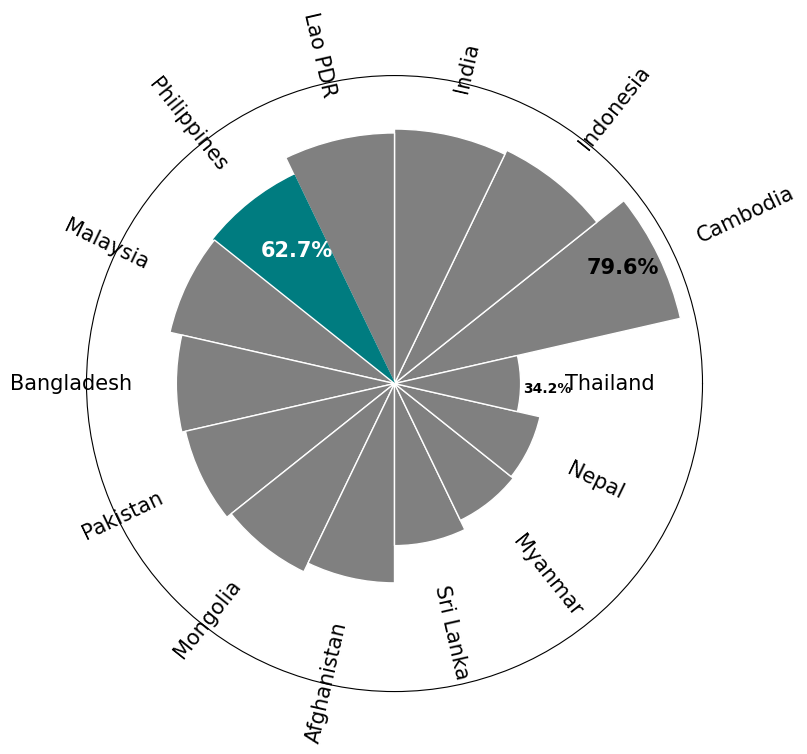

In [143]:
# set the size
plt.figure(figsize=(8,8))

# base plot with dart chart and degrees all around it
ax = plt.subplot(111, polar=True)
plt.axis()

# set min and max value
lowerLimit = 0
max_v = 100

# set heights and width
heights = covid_most_worried['percentage']
width   = 2*np.pi / len(covid_most_worried.index)

# set index and angle
indexes = list(range(1, len(covid_most_worried.index)+1))
angles = [element * width for element in indexes]

# for bars or "pie slices"
bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit, linewidth=1, edgecolor="white", color= 'grey')

# set the color
bars[4].set_color('#007C80')

# labels
labelPadding = 12

# Country labels were added per slice
for bar, angle, height, label in zip(bars,angles, heights, covid_most_worried['economy']):
    rotation = np.rad2deg(angle)
    alignment = ""
    # deal with alignment
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation, 
            rotation_mode="anchor",
           size = 15)
    ax.set_thetagrids([], labels=[], grid = False)
    
# Removed axis grids?
ax.yaxis.grid(False)
ax.set_yticklabels([])


# Add data values
ax.text ( x = 12.5, y = 35, s = '34.2%', weight = 'bold', size = 10)
ax.text ( x = 14.95, y = 50, s = '62.7%', weight = 'bold', size = 15, color= 'white')
ax.text ( x = 119.9, y = 60, s = '79.6%', weight = 'bold', size = 15)

plt.show()

### 3.2) What are Filipinos most worried about?

In [151]:
fin_worried_radar = dfph.copy(deep=True)

In [152]:
fin_worried_radar = fin_worried_radar.rename(columns = {'fin44a' : 'old age',
                                    'fin44b' : 'medical cost',
                                    'fin44c' : 'bills',
                                    'fin44d' : 'education' })
fin_worried_radar.head(n=3)

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity_f2f,account,account_fin,account_mob,fin1_1a,fin1_1b,fin2,fin4,fin4a,fin5,fin6,fin7,fin8,fin8a,fin8b,fin9,fin9a,fin10,fin10_1a,fin10_1b,fin10_1c,fin10_1d,fin10_1e,fin10a,fin10b,fin11_1,fin11a,fin11b,fin11c,fin11d,fin11e,fin11f,fin11g,fin11h,fin13_1a,fin13_1b,fin13_1c,fin13_1d,fin13_1e,fin13_1f,fin13a,fin13b,fin13c,fin13d,fin14_1,fin14_2,fin14_2_China,fin14a,fin14a1,fin14b,fin14c,fin14c_2,fin14c_2_China,fin16,fin17a,fin17a1,fin17b,fin20,fin22a,fin22b,fin22c,fin24,fin24a,fin24b,fin26,fin27_1,fin27c1,fin27c2,fin28,fin29_1,fin29c1,fin29c2,fin30,fin31a,fin31b,fin31b1,fin31b1_China,fin31c,fin32,fin33,fin34a,fin34b,fin34d,fin34e,fin35,fin37,fin38,fin39a,fin39b,fin39d,fin39e,fin42,fin42a,fin43a,fin43b,fin43d,fin43e,old age,medical cost,bills,education,fin45,fin45_1,fin45_1_China,saved,borrowed,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,govt_help,fw,fin_old_age,fin_medical_cost,fin_bills,fin_educ,fin_covid,EAP,age_grp,sex,account_type,inc_grp,inc_grp2,count,emp_status,age_grp2,educ2,sea,fin_covid_most
90750,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,175160143,0.177654,2,34.0,3,5,1.0,NaN,1,1,1.0,2.0,2.0,1,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,1,2.0,NaN,1,1,1,1.0,2.0,NaN,1,1,1.0,2.0,2,2,2,NaN,1,3.0,3.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1,1.0,1.0,2.0,NaN,NaN,1,2.0,1.0,1.0,NaN,NaN,1.0,2,2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2,2,2,3,1.0,2.0,NaN,1,0,1,4,4,4.0,1,5.0,1,1,1,1.0,0.0,1.0,1,1,1,0,1,1,b) 30 - 39,male,both bank & mobile,a) richest 20%,middle to high income,1,1,19 - 59,c) tertiary,1.0,0
90751,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,196715468,0.318118,1,25.0,3,4,1.0,NaN,1,1,0.0,NaN,NaN,1,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,1,2.0,1.0,NaN,1,1,NaN,2.0,2,2,2,NaN,1,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,1,2.0,2.0,NaN,NaN,1.0,1,2.0,1.0,2.0,NaN,NaN,1.0,2,2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2,2,2,2,3.0,1.0,NaN,1,0,1,4,4,4.0,2,4.0,1,1,1,0.0,0.0,1.0,1,1,1,1,1,1,a) 15 - 29,female,bank only,b) fourth 20%,middle to high income,1,1,19 - 59,c) tertiary,1.0,1
90752,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,137538586,0.422107,1,26.0,2,5,1.0,NaN,1,1,0.0,NaN,NaN,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,2,2,2,NaN,NaN,NaN,2,2,NaN,2.0,2,2,2,NaN,1,3.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3,3,3,3,NaN,3.0,NaN,0,1,4,4,4,4.0,4,3.0,1,2,1,1.0,0.0,0.0,0,0,0,0,0,1,a) 15 - 29,female,bank only,a) richest 20%,middle to high income,1,1,19 - 59,b) secondary,1.0,0


In [153]:
radar_df = pd.DataFrame({
   'labels': ['old age', 'medical cost', 'bills', 'education'],
   'Verry Worried': [sum(fin_worried_radar['old age']==1), sum(fin_worried_radar['medical cost']==1), sum(fin_worried_radar['bills']==1), sum(fin_worried_radar['education']==1)],
   'Somewhat Worried': [sum(fin_worried_radar['old age']==2), sum(fin_worried_radar['medical cost']==2), sum(fin_worried_radar['bills']==2), sum(fin_worried_radar['education']==2)],
   'Not Worried at all': [sum(fin_worried_radar['old age']==3), sum(fin_worried_radar['medical cost']==3), sum(fin_worried_radar['bills']==3), sum(fin_worried_radar['education']==3)]
})

radar_df

,labels,Verry Worried,Somewhat Worried,Not Worried at all
0,old age,447,439,114
1,medical cost,601,290,109
2,bills,387,427,186
3,education,370,321,309


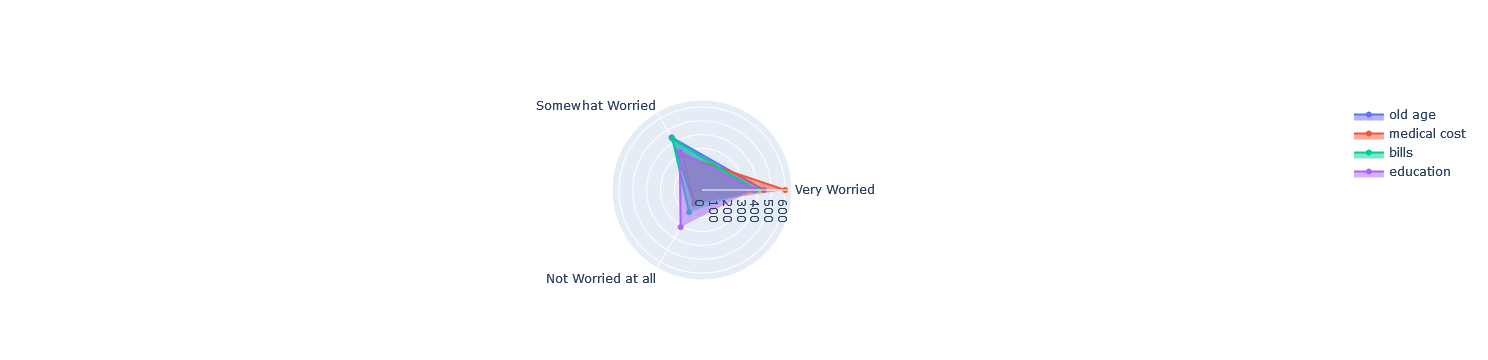

In [154]:
# Create a trace for each label
traces = []
for i in range(len(radar_df)):
    traces.append(go.Scatterpolar(
        r=[radar_df.iloc[i, 1], radar_df.iloc[i, 2], radar_df.iloc[i, 3]],
        theta=['Very Worried', 'Somewhat Worried', 'Not Worried at all'],
        fill='toself',
        name=radar_df.iloc[i, 0]
    ))

# Define the layout of the chart
layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 650]
        )
    ),
    showlegend=True
)

# Create the chart figure
fig = go.Figure(data=traces, layout=layout)

# Display the chart
fig.show()

### 3.3) Employment Status vs Government Assistance

In [167]:
bar_emp          = dfph[['govt_help', 'emp_status', 'count']]
emp_status_value = {1 : "Employed", 0 : "Unemployed"}
bar_emp          = bar_emp.replace({'emp_status' : emp_status_value})
bar_emp.head(n=3)

,govt_help,emp_status,count
90750,0.0,Employed,1
90751,0.0,Employed,1
90752,0.0,Employed,1


In [177]:
bar_emp = bar_emp.groupby('emp_status').agg({'count':'sum', 'govt_help':'sum'}).reset_index()
bar_emp['% Share'] = (bar_emp['govt_help'] / bar_emp['count'])*100
bar_emp.head(n=3)

,emp_status,count,govt_help,% Share
0,Employed,707,232.0,32.814710
1,Unemployed,293,97.0,33.105802


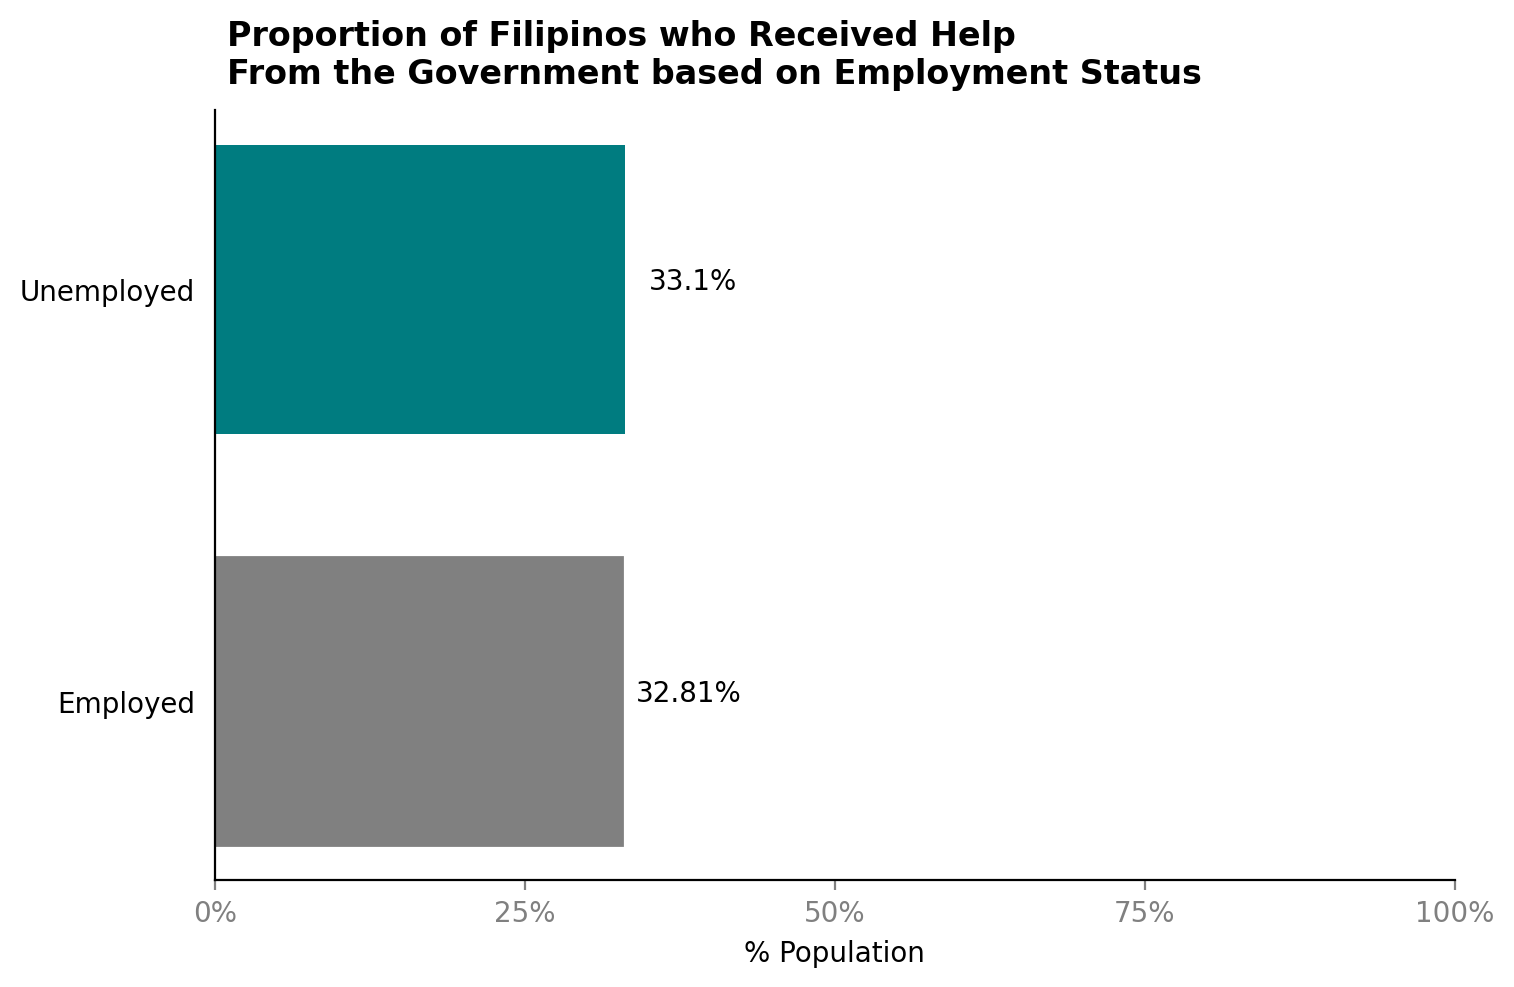

In [176]:
# create a subplot with small size
fig, ax = plt.subplots(figsize=(8, 5), dpi = 200)

# Run Barchart
bar_chart = ax.barh(bar_emp['emp_status'],
                    bar_emp['% Share'],
    height = 0.7, #set width
    color = '#007C80') #set color


# remove spines
for location in [ 'right', 'top']:
   ax.spines[location].set_visible(False)

# Set the first bar to color Gret
bar_chart[0].set_color('grey')

# set y limits until 100    
ax.set_xticks([0, 25, 50, 75, 100])

# Set the name of the limits to percenge
ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

# remove ticks
ax.tick_params(top=False, left=False)

# make the numbers on the left grey
ax.tick_params(axis='x', colors='grey')

# input title
ax.text(x = 1, y = 1.5, s = 'Proportion of Filipinos who Received Help\nFrom the Government based on Employment Status',
        weight = 'bold',  size = 12)

# manually input the text '34.08%'
ax.text( x = 34, y = 0.0001, s = '32.81%', weight = 'normal', size = 10)

# manually input '10.7%'
ax.text( x = 35, y = 1, s = '33.1%', weight = 'normal', size = 10)

ax.set_xlabel('% Population')

# show the plot
plt.show()

### 3.4) Financial Access vs Government Assistance

In [249]:
bar_account = dfph[['govt_help', 'account_type', 'count']]

print(bar_account.shape)
bar_account.head(n=3)

(1000, 3)


,govt_help,account_type,count
90750,0.0,Bank & Mobile,1
90751,0.0,Bank Only,1
90752,0.0,Bank Only,1


In [254]:
bar_account = bar_account.groupby('account_type').agg({'count':'sum', 'govt_help':'sum'}).reset_index()
bar_account['% Share'] = (bar_account['govt_help'] / bar_account['count'])*100
bar_account = bar_account.sort_values(by=['% Share'], ascending=True)
bar_account

,account_type,count,govt_help,% Share
3,No Account,373,114.0,30.563003
0,Bank & Mobile,237,79.0,33.333333
2,Mobile Only,63,21.0,33.333333
1,Bank Only,327,115.0,35.168196


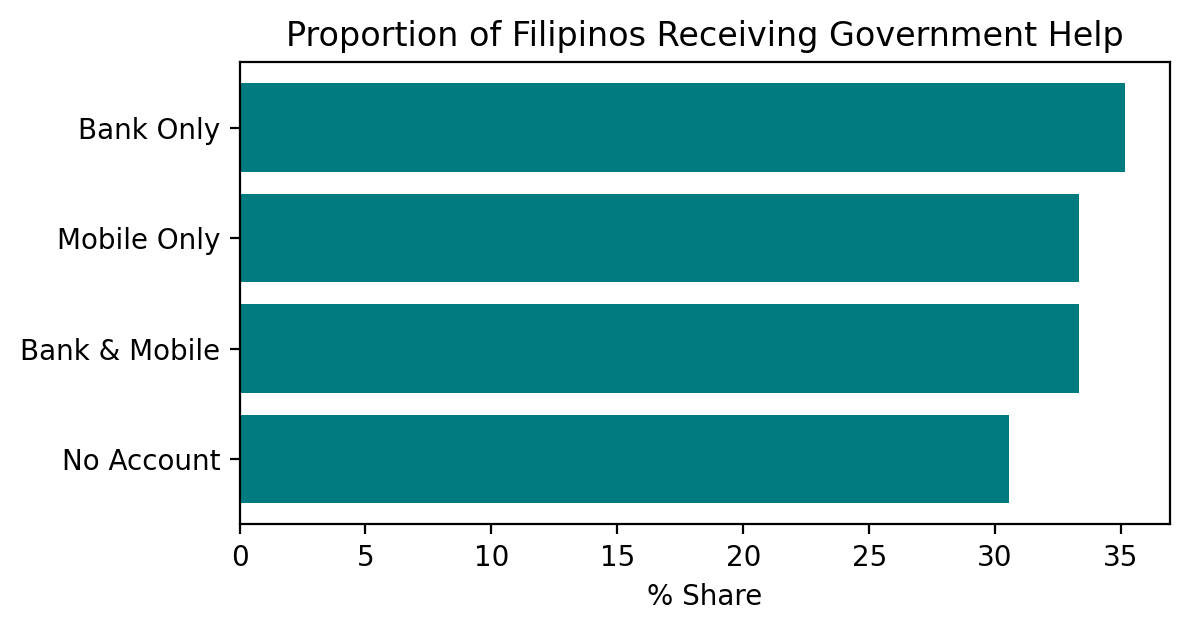

In [256]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run bar plot
plt.barh(
    bar_account['account_type'],
    bar_account['% Share'],
    color = '#007C80')

# Set title
plt.title('Proportion of Filipinos Receiving Government Help')

# Set labels
plt.xlabel('% Share')
# plt.ylabel('Financial Account')

# Manually Input Labels
# ax.text( x = 100, y = 100, s = '35.2%', weight = 'normal', size = 10)

# Show figure
plt.show()

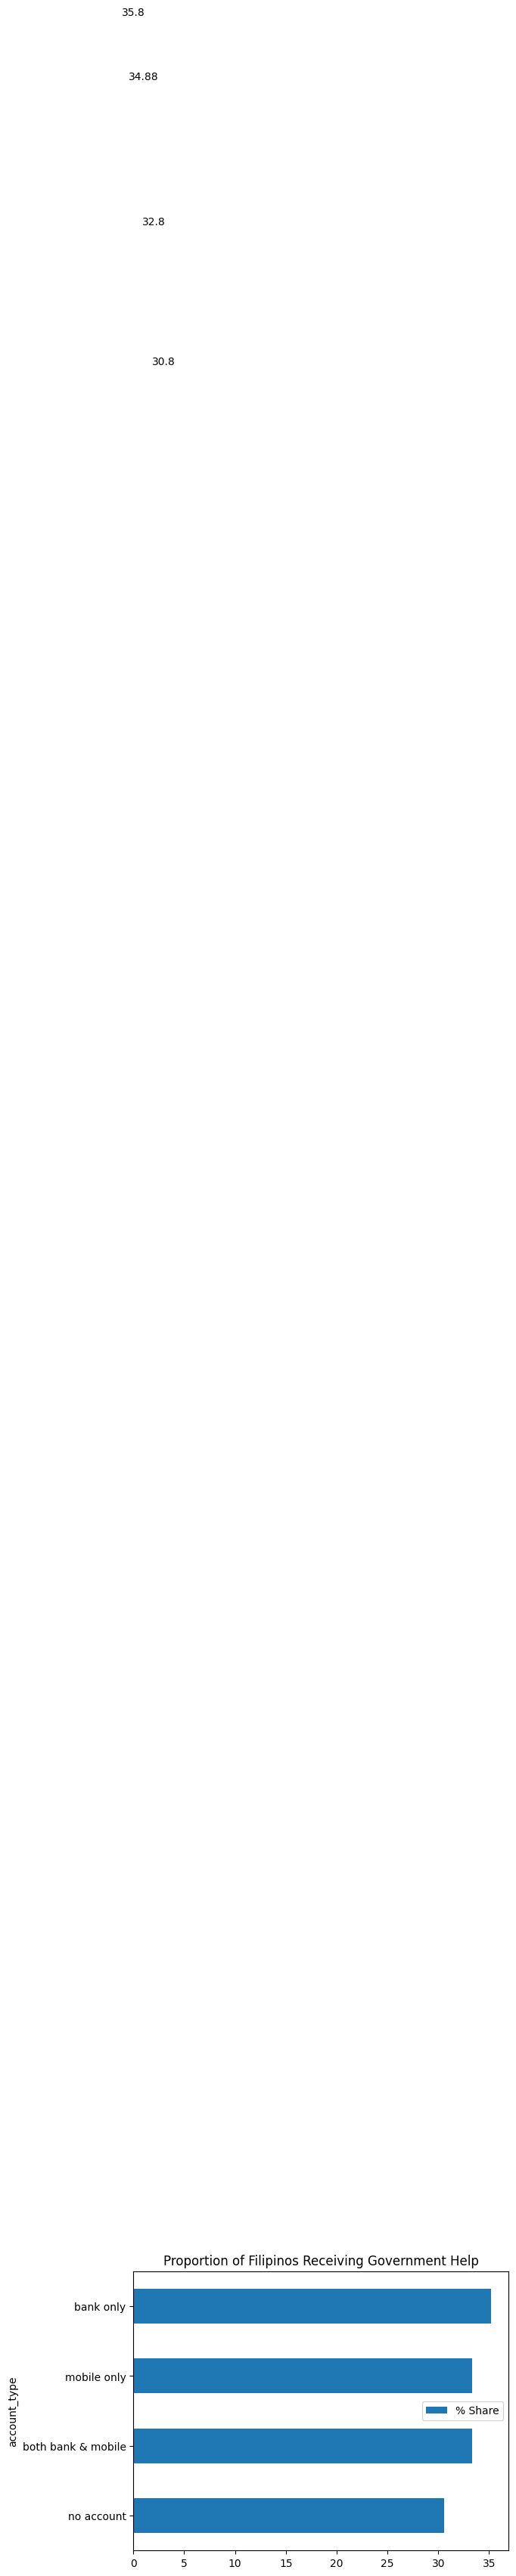

In [239]:
bar_account[['account_type', '% Share']].plot(
    x = 'account_type',
    kind = 'barh',
    title = 'Proportion of Filipinos Receiving Government Help',
    mark_right = True)

y = ["has FI only", "has mobile only", "has both", "no financial access"]
x = [35.8, 34.88, 32.8, 30.8]

# Show data values
def addlabels(y,x):
    for i in range(len(y)):
        plt.text(i, x[i], x[i], ha = 'center')
                 
addlabels(y,x)

-----

# <font color='darkblue'> Step 4: Machine Learning </font>

In [257]:
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [323]:
dfph.head(n=3)

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity_f2f,account,account_fin,account_mob,fin1_1a,fin1_1b,fin2,fin4,fin4a,fin5,fin6,fin7,fin8,fin8a,fin8b,fin9,fin9a,fin10,fin10_1a,fin10_1b,fin10_1c,fin10_1d,fin10_1e,fin10a,fin10b,fin11_1,fin11a,fin11b,fin11c,fin11d,fin11e,fin11f,fin11g,fin11h,fin13_1a,fin13_1b,fin13_1c,fin13_1d,fin13_1e,fin13_1f,fin13a,fin13b,fin13c,fin13d,fin14_1,fin14_2,fin14_2_China,fin14a,fin14a1,fin14b,fin14c,fin14c_2,fin14c_2_China,fin16,fin17a,fin17a1,fin17b,fin20,fin22a,fin22b,fin22c,fin24,fin24a,fin24b,fin26,fin27_1,fin27c1,fin27c2,fin28,fin29_1,fin29c1,fin29c2,fin30,fin31a,fin31b,fin31b1,fin31b1_China,fin31c,fin32,fin33,fin34a,fin34b,fin34d,fin34e,fin35,fin37,fin38,fin39a,fin39b,fin39d,fin39e,fin42,fin42a,fin43a,fin43b,fin43d,fin43e,fin44a,fin44b,fin44c,fin44d,fin45,fin45_1,fin45_1_China,saved,borrowed,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,govt_help,fw,fin_old_age,fin_medical_cost,fin_bills,fin_educ,fin_covid,fin_covid_most,EAP,sea,count,age_grp,age_grp2,sex,account_type,inc_grp,inc_grp2,inc_grp3,emp_status,emp_status_value,educ2
90750,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,175160143,0.177654,2,34.0,3,5,1.0,NaN,1,1,1.0,2.0,2.0,1,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,1,2.0,NaN,1,1,1,1.0,2.0,NaN,1,1,1.0,2.0,2,2,2,NaN,1,3.0,3.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1,1.0,1.0,2.0,NaN,NaN,1,2.0,1.0,1.0,NaN,NaN,1.0,2,2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2,2,2,3,1.0,2.0,NaN,1,0,1,4,4,4.0,1,5.0,1,1,1,1.0,0.0,1.0,1,1,1,0,1,0,1,1.0,1,b) 30 - 39,19 - 59,male,Bank & Mobile,a) richest 20%,middle to high income,high income,1,Employed,c) tertiary
90751,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,196715468,0.318118,1,25.0,3,4,1.0,NaN,1,1,0.0,NaN,NaN,1,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,1,2.0,1.0,NaN,1,1,NaN,2.0,2,2,2,NaN,1,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,1,2.0,2.0,NaN,NaN,1.0,1,2.0,1.0,2.0,NaN,NaN,1.0,2,2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2,2,2,2,3.0,1.0,NaN,1,0,1,4,4,4.0,2,4.0,1,1,1,0.0,0.0,1.0,1,1,1,1,1,1,1,1.0,1,a) 15 - 29,19 - 59,female,Bank Only,b) fourth 20%,middle to high income,high income,1,Employed,c) tertiary
90752,Philippines,PHL,East Asia & Pacific (excluding high income),76659992.0,137538586,0.422107,1,26.0,2,5,1.0,NaN,1,1,0.0,NaN,NaN,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,2,2,2,NaN,NaN,NaN,2,2,NaN,2.0,2,2,2,NaN,1,3.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3,3,3,3,NaN,3.0,NaN,0,1,4,4,4,4.0,4,3.0,1,2,1,1.0,0.0,0.0,0,0,0,0,0,0,1,1.0,1,a) 15 - 29,19 - 59,female,Bank Only,a) richest 20%,middle to high income,high income,1,Employed,b) secondary


In [406]:
del cluster_data

In [435]:
# Filter data
cluster_data = dfph[
    [
        'govt_help',
#         'educ2',
        'inc_grp2',
        'emp_status_value',
        'age_grp',
        'account'
        
    ]
]

In [436]:
cluster_data.head(n=3)

,govt_help,inc_grp2,emp_status_value,age_grp2,account
90750,0.0,middle to high income,Employed,19 - 59,1
90751,0.0,middle to high income,Employed,19 - 59,1
90752,0.0,middle to high income,Employed,19 - 59,1


In [437]:
# drop null values
cluster_data = cluster_data.dropna()

# Check nulls
cluster_data.isna().sum()

govt_help           0
inc_grp2            0
emp_status_value    0
age_grp2            0
account             0
dtype: int64

In [438]:
# Replace govt help variable values

govt_help_mapping = {
    1: 'Yes',
    0: 'No'
}


# Replace values using the mapping
cluster_data = cluster_data.replace(
    {
        'govt_help': govt_help_mapping
     }
    )

In [439]:
# Rename columns
cluster_data = cluster_data.rename(
    columns = {
        'govt_help':'Received Government Assistance', 
#         'educ2':'Educational Attainment',
        'inc_grp3': 'Income Group',
        'emp_status_value': 'Employment Status',
        'age_grp2': 'Age Group'
        }
)

cluster_data.head(n=3)

,Received Government Assistance,inc_grp2,Employment Status,Age Group,account
90750,No,middle to high income,Employed,19 - 59,1
90751,No,middle to high income,Employed,19 - 59,1
90752,No,middle to high income,Employed,19 - 59,1


In [440]:
# Create clustering function
def run_kmodes(n_clusters=None, cluster_data=None):
  # Initialize clustering
  kmodes = KModes(
      init="random",
      n_clusters=n_clusters,
      random_state=42
      )
  
  # Apply clustering to the data
  kmodes.fit(cluster_data)

  # Print intertia
  print(f"Cost for n_clusters = {n_clusters}: {kmodes.cost_}")

  return kmodes.cost_, kmodes.labels_

In [441]:
# Create container for cost
cost_values = []

In [442]:
# Run clustering and save inertia to our empty container
for k in range(1, 11):
  # Run our function
  cost, labels = run_kmodes(
    n_clusters=k,
    cluster_data=cluster_data
  )

  # Save cost to our container
  cost_values.append(cost)

Cost for n_clusters = 1: 1427.0
Cost for n_clusters = 2: 1000.0
Cost for n_clusters = 3: 757.0
Cost for n_clusters = 4: 647.0
Cost for n_clusters = 5: 582.0
Cost for n_clusters = 6: 503.0
Cost for n_clusters = 7: 461.0
Cost for n_clusters = 8: 409.0
Cost for n_clusters = 9: 382.0
Cost for n_clusters = 10: 332.0


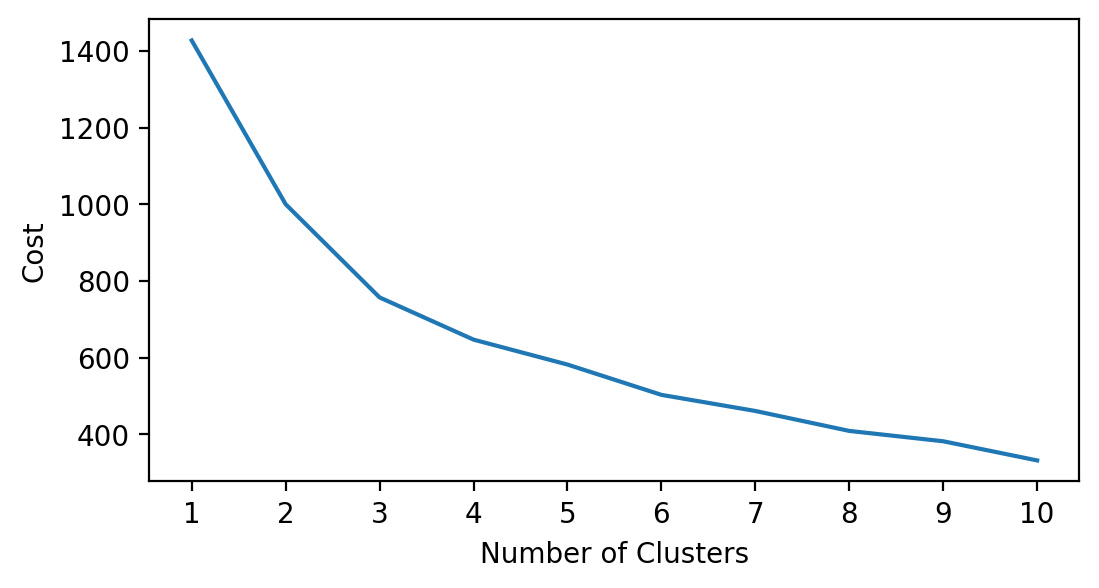

In [443]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Plot inertia vs number of clusters
plt.plot(range(1, 11), cost_values)

# Format plot
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

# Show plot
plt.show()

In [444]:
# Run our K-Modes function for n_clusters=5
cost, labels = run_kmodes(
  n_clusters=8,
  cluster_data=cluster_data
)

Cost for n_clusters = 8: 409.0


In [445]:
# Inspect labels
labels

array([3, 3, 3, 3, 2, 6, 4, 4, 3, 0, 3, 3, 4, 3, 5, 1, 3, 2, 3, 7, 7, 4,
       2, 2, 3, 7, 1, 4, 3, 3, 6, 5, 1, 1, 4, 4, 1, 3, 3, 1, 2, 4, 3, 4,
       5, 3, 1, 2, 0, 3, 0, 4, 3, 4, 3, 2, 3, 3, 7, 7, 4, 3, 0, 3, 1, 3,
       0, 4, 3, 4, 3, 4, 3, 3, 1, 4, 3, 4, 5, 3, 5, 2, 1, 3, 0, 1, 2, 0,
       1, 4, 4, 6, 5, 4, 1, 4, 3, 4, 2, 6, 4, 1, 1, 1, 4, 4, 4, 0, 7, 5,
       2, 6, 2, 4, 3, 1, 0, 4, 0, 1, 0, 3, 1, 0, 1, 6, 1, 3, 4, 0, 4, 3,
       2, 0, 0, 3, 0, 3, 1, 5, 0, 3, 6, 4, 1, 2, 3, 1, 3, 1, 3, 1, 3, 1,
       7, 3, 1, 4, 0, 4, 1, 7, 1, 3, 3, 1, 1, 0, 7, 0, 3, 0, 0, 3, 3, 1,
       1, 4, 0, 5, 0, 0, 0, 3, 3, 3, 7, 7, 2, 3, 5, 0, 1, 0, 7, 0, 0, 5,
       0, 3, 3, 1, 3, 7, 3, 1, 1, 4, 3, 3, 3, 6, 3, 4, 7, 4, 1, 1, 2, 7,
       5, 3, 1, 3, 1, 0, 4, 5, 3, 1, 0, 4, 1, 1, 1, 0, 0, 4, 7, 6, 4, 5,
       1, 5, 2, 3, 2, 3, 0, 0, 3, 4, 3, 5, 4, 3, 2, 1, 0, 5, 3, 4, 2, 6,
       6, 6, 0, 3, 3, 1, 2, 7, 3, 5, 1, 1, 0, 4, 5, 7, 1, 1, 0, 1, 6, 6,
       7, 3, 1, 0, 1, 2, 5, 0, 3, 4, 1, 6, 3, 3, 3,

In [446]:
# Append the labels to cluster data
cluster_data['labels'] = labels
cluster_data.head(n=3)

,Received Government Assistance,inc_grp2,Employment Status,Age Group,account,labels
90750,No,middle to high income,Employed,19 - 59,1,3
90751,No,middle to high income,Employed,19 - 59,1,3
90752,No,middle to high income,Employed,19 - 59,1,3


In [447]:
# Inspect the characteristics 
cluster_data.groupby('labels').agg(pd.Series.mode)

,Received Government Assistance,inc_grp2,Employment Status,Age Group,account
labels,,,,,
0,No,middle to high income,Unemployed,19 - 59,1
1,Yes,middle to high income,Employed,19 - 59,1
2,No,middle to high income,Employed,19 - 59,0
3,No,middle to high income,Employed,19 - 59,1
4,No,low income,Employed,19 - 59,0
5,Yes,middle to high income,Unemployed,15 - 18,0
6,No,low income,Employed,19 - 59,1
7,Yes,middle to high income,Unemployed,19 - 59,1


In [448]:
cluster_data['labels'].value_counts()

3    276
1    200
4    171
0    128
2     80
5     53
7     49
6     42
Name: labels, dtype: int64